# 0) 환경 준비 & CSV 로드

---

In [1]:
# Cell 0: 기본 라이브러리
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 200)

In [2]:
# Cell 1: CSV 로드 (경로 주의: 윈도우는 r"..." 또는 백슬래시 이스케이프)
csv_path = r"C:\Users\LECS\Desktop\JSY\10. AIFFEL\251030_self_preprocessing_dataset(multi_0).csv"

# 한글/윈도우 인코딩 이슈 대비: utf-8-sig 우선, 실패 시 cp949 시도
try:
    df = pd.read_csv(csv_path, encoding="utf-8-sig")
except UnicodeDecodeError:
    df = pd.read_csv(csv_path, encoding="cp949")

# ✅ 이 코드를 추가해서 실제 컬럼명을 모두 출력해보세요!
print("===== 실제 CSV 컬럼 목록 =====")
print(df.columns.to_list())
print("============================")

# 완전 빈 행 제거
df = df.dropna(how="all").reset_index(drop=True)
print("빈 행 제거 후:", df.shape)
df.head()

===== 실제 CSV 컬럼 목록 =====
['Paper ID', 'Sample', 'Li ratio', 'Ni ratio', 'Co ratio', 'Mn ratio', 'O ratio', 'W ratio', 'Commercial NCM used', 'Lithium source', 'Synthesis method', 'Crystallization method', 'Crystallization final temperature', 'Crystallization final duration (hours)', 'Doping', 'Coating', 'Active material ratio', 'Conductive additive ratio', 'Binder ratio', 'Electrolyte salt', 'Electrolyte concentration', 'EC_ratio', 'DMC_ratio', 'EMC_ratio', 'DEC_ratio', 'Additive', 'Loading density (mass loading of NCM)', 'Particle size', 'Particle shape', 'Particle distribution', 'Coating layer characteristics', 'Crystal structure and lattice characteristics', 'Voltage_min', 'Voltage_max', 'Temperature', 'C-rate 0.05', 'C-rate 0.1', 'C-rate 0.2', 'C-rate 0.5', 'C-rate 1.0', 'C-rate 2.0', 'C-rate 5.0', 'C-rate 10.0', 'C-rate 20.0', 'C-rate 40.0', 'C-rate 4.0', 'C-rate 6.0']
빈 행 제거 후: (25, 47)


,Paper ID,Sample,Li ratio,Ni ratio,Co ratio,Mn ratio,O ratio,W ratio,Commercial NCM used,Lithium source,Synthesis method,Crystallization method,Crystallization final temperature,Crystallization final duration (hours),Doping,Coating,Active material ratio,Conductive additive ratio,Binder ratio,Electrolyte salt,Electrolyte concentration,EC_ratio,DMC_ratio,EMC_ratio,DEC_ratio,Additive,Loading density (mass loading of NCM),Particle size,Particle shape,Particle distribution,Coating layer characteristics,Crystal structure and lattice characteristics,Voltage_min,Voltage_max,Temperature,C-rate 0.05,C-rate 0.1,C-rate 0.2,C-rate 0.5,C-rate 1.0,C-rate 2.0,C-rate 5.0,C-rate 10.0,C-rate 20.0,C-rate 40.0,C-rate 4.0,C-rate 6.0
0,11.0,NR0,1.00,0.33,0.33,0.33,2.0,0.0,no,LiNO3,solution combustion,NaN,850.0,15.0,none,Carbon-based,NaN,NaN,NaN,LiPF6,1.0,0.5,0.5,0.0,0.0,none,NaN,NaN,NaN,NaN,NaN,NaN,2.5,4.3,25.0,NaN,155.3,NaN,NaN,123.0,NaN,45.5,NaN,NaN,NaN,NaN,NaN
1,11.0,NR1,1.00,0.33,0.33,0.33,2.0,0.0,no,LiNO3,solution combustion,NaN,850.0,15.0,none,Carbon-based,NaN,NaN,NaN,LiPF6,1.0,0.5,0.5,0.0,0.0,RGO,NaN,NaN,NaN,NaN,NaN,NaN,2.5,4.3,25.0,NaN,154.6,NaN,NaN,NaN,NaN,47.0,NaN,NaN,NaN,NaN,NaN
2,11.0,NR3,1.00,0.33,0.33,0.33,2.0,0.0,no,LiNO3,solution combustion,NaN,850.0,15.0,none,Carbon-based,NaN,NaN,NaN,LiPF6,1.0,0.5,0.5,0.0,0.0,RGO,NaN,NaN,NaN,NaN,NaN,NaN,2.5,4.3,25.0,NaN,166.5,NaN,NaN,NaN,NaN,75.4,NaN,NaN,NaN,NaN,NaN
3,11.0,NR5,1.00,0.33,0.33,0.33,2.0,0.0,no,LiNO3,solution combustion,NaN,850.0,15.0,none,Carbon-based,NaN,NaN,NaN,LiPF6,1.0,0.5,0.5,0.0,0.0,RGO,NaN,NaN,NaN,NaN,NaN,NaN,2.5,4.3,25.0,NaN,175.0,NaN,NaN,NaN,NaN,95.4,NaN,NaN,NaN,NaN,NaN
4,16.0,NCM,1.01,0.35,0.32,0.32,2.0,0.0,no,LiAc,sol-gel,NaN,850.0,10.0,none,none,80.0,5.0,15.0,LiPF6,1.0,0.5,0.5,0.0,0.0,none,5.0,particle sizes range from 50 to 200 nm,irregular particle shape,particles can be identified clearly,NaN,hexagonal layered structure with a c/a ratio o...,2.5,4.5,30.0,NaN,NaN,NaN,175.7,154.8,143.5,101.7,71.5,44.5,13.2,NaN,NaN


# 1) 스키마 선언 (수정해서 쓰기)

---

In [7]:
# Cell 2: 열 그룹 정의 (여기 이름은 네 CSV에 맞게 수정!)
numeric_cols = [
    # 예시: 아래는 전부 float로 캐스팅
    "Li ratio","Ni ratio","Co ratio","Mn ratio","O ratio","W ratio",
    "Crystallization final temperature","Crystallization final duration (hours)", "Active material ratio", "Conductive additive ratio","Binder ratio",
    "Electrolyte concentration", "EC_ratio", "DMC_ratio", "EMC_ratio", "DEC_ratio", "Loading density (mass loading of NCM)","Voltage_min","Voltage_max","Temperature"
    # Particle size 처리 후 생성될 대표 열들(있으면)
    # "primary_size_mean_nm","secondary_size_mean_nm","overall_size_mean_nm"
]

binary_cols = [
    # yes/no -> 1.0/0.0
    "Commercial NCM used"
]

categorical_cols = [
    # 네가 카테고리화 해둔 열들(예: Lithium source, Synthesis method, Doping, Coating 등)
    "Synthesis method"
    #,""Lithium source"","Crystallization method","Doping","Coating","Electrolyte salt","Additive"
    # 전해액 조합(빈도 top-5만) 열이 있다면 여기 포함 가능: "Electrolyte combination (top5)" 등
]

target_cols = [
    "C-rate 0.1","C-rate 1.0","C-rate 5.0"
]


# 2) 전처리 함수 (히트맵 전용)

---

In [ ]:
# Cell 3: 함수 정의

def cast_types_for_heatmap(df, numeric_cols, binary_cols, categorical_cols, target_cols):
    df = df.copy()

    # 숫자형 + 타깃 → float
    for c in numeric_cols + target_cols:
        if c in df.columns:
            df[c] = pd.to_numeric(df[c], errors="coerce").astype(float)

    # 이진형 yes/no → 1/0
    for c in binary_cols:
        if c in df.columns:
            df[c] = (
                df[c].astype("string").str.strip().str.lower()
                  .replace({"yes": "1", "no": "0"})
            )
            df[c] = pd.to_numeric(df[c], errors="coerce").astype(float)

    # 범주형: NaN 유지 + 문자열 정규화 + "nan" 문자열은 진짜 NaN으로 교정
    for c in categorical_cols:
        if c in df.columns:
            s = df[c].astype("string").str.strip().str.lower()
            df[c] = s.mask(s == "nan")  # "nan" 문자열을 진짜 NaN으로
    return df

def one_hot_with_other(df, categorical_cols, top_k=8, prefix_sep="__"):
    """
    각 범주형 열에 대해 상위 top_k 카테고리만 유지하고 나머지는 'other'로 묶은 뒤 원핫.
    dummy_na=True로 결측도 하나의 상태로 반영.
    """
    df = df.copy()
    for c in categorical_cols:
        if c not in df.columns:
            continue
        vc = df[c].value_counts(dropna=True)
        keep = set(vc.head(top_k).index)
        df[c] = df[c].where(df[c].isin(keep), other="other")
    df = pd.get_dummies(df, columns=[c for c in categorical_cols if c in df.columns],
                        dummy_na=False, prefix_sep=prefix_sep)
    return df

def drop_zero_variance(df):
    """
    - 모든 값이 동일(상수)인 열 제거 (NaN 섞여 있어도 제거)
    - 전부 NaN인 열 제거
    - float/int 기준 (df는 이미 숫자형만 들어왔다고 가정)
    """
    keep = []
    drop_report = []  # 디버깅용: 무엇을 왜 지우는지 기록

    for c in df.columns:
        col = df[c]
        non_na = col.dropna()

        # 전부 NaN이면 제거
        if non_na.empty:
            drop_report.append((c, "all-NaN"))
            continue

        # NaN을 제외한 고유값이 1개면 상수열 → 제거
        if non_na.nunique(dropna=False) <= 1:
            drop_report.append((c, "constant (nunique=1)"))
            continue

        # 표준편차가 사실상 0이면 상수열로 간주 → 제거
        # (부동소수점 안전장치; ddof=0로 母표준편차)
        if np.isclose(non_na.std(ddof=0), 0.0, atol=1e-12):
            drop_report.append((c, "std≈0"))
            continue

        keep.append(c)

    # 필요하면 어떤 열이 제거됐는지 확인
    if drop_report:
        print("[drop_zero_variance] dropped columns:")
        for name, reason in drop_report:
            print(f"  - {name}: {reason}")

    return df[keep]

def make_heatmap_ready_df(df, numeric_cols, binary_cols, categorical_cols, target_cols, top_k=8):
    # ✅ 1) 허용 컬럼만 우선 필터 (여기서 Paper ID 등 불필요 열 제거)
    keep = set(numeric_cols + binary_cols + categorical_cols + target_cols)
    df = df.loc[:, [c for c in df.columns if c in keep]].copy()

    # 2) 타입 캐스팅
    df = cast_types_for_heatmap(df, numeric_cols, binary_cols, categorical_cols, target_cols)

    # 3) 범주형 원핫 (여기서 새 더미열들이 추가됨)
    df = one_hot_with_other(df, categorical_cols, top_k=top_k)

    # 4) 숫자형만 선택 (이제는 우리가 만든 숫자 + 더미열만 존재)
    df = df.select_dtypes(include=[np.number])

    # ===== [디버깅] =====
    print("\n--- 1. [Before] drop_zero_variance (원핫 포함) ---")
    print(df.columns.to_list())
    # =====================

    # 5) 분산 0 컬럼 제거
    df = drop_zero_variance(df)

    # ===== [디버깅] =====
    print("\n--- 2. [After] drop_zero_variance (최종) ---")
    print(df.columns.to_list())
    # =====================

    return df


def compute_corr(df_numeric, methods=("pearson","spearman")):
    # 완성된 숫자형 DF로부터 Pearson / Spearman 상관계수 행렬을 계산하는 함수
    corrs = {}
    for m in methods:
        corrs[m] = df_numeric.corr(method=m)
    return corrs


# 3) 히트맵용 DF 생성 & 상관계수 계산

---

In [13]:
# Cell 4: 파이프라인 실행
df_heat = make_heatmap_ready_df(
    df,
    numeric_cols=numeric_cols,
    binary_cols=binary_cols,
    categorical_cols=categorical_cols,
    target_cols=target_cols,
    top_k=8,   # 필요 시 조정: 카테고리 너무 많으면 5~10 사이 추천
)

corrs = compute_corr(df_heat, methods=("pearson","spearman"))

# 저장 (옵션)
out_dir = r"C:\Users\LECS\Desktop\JSY\10. AIFFEL"
corrs["pearson"].to_csv(out_dir + r"\corr_pearson.csv", index=True)
corrs["spearman"].to_csv(out_dir + r"\corr_spearman.csv", index=True)

df_heat.shape, list(corrs.keys())



--- 1. [Before] drop_zero_variance (원핫 포함) ---
['Li ratio', 'Ni ratio', 'Co ratio', 'Mn ratio', 'O ratio', 'W ratio', 'Commercial NCM used', 'Crystallization final temperature', 'Crystallization final duration (hours)', 'Active material ratio', 'Conductive additive ratio', 'Binder ratio', 'Electrolyte concentration', 'EC_ratio', 'DMC_ratio', 'EMC_ratio', 'DEC_ratio', 'Loading density (mass loading of NCM)', 'Voltage_min', 'Voltage_max', 'Temperature', 'C-rate 0.1', 'C-rate 1.0', 'C-rate 5.0']
[drop_zero_variance] dropped columns:
  - O ratio: constant (nunique=1)
  - Electrolyte concentration: constant (nunique=1)


((25, 22), ['pearson', 'spearman'])

# 4) 히트맵 시각화 (피처↔타깃 집중 보기)

---

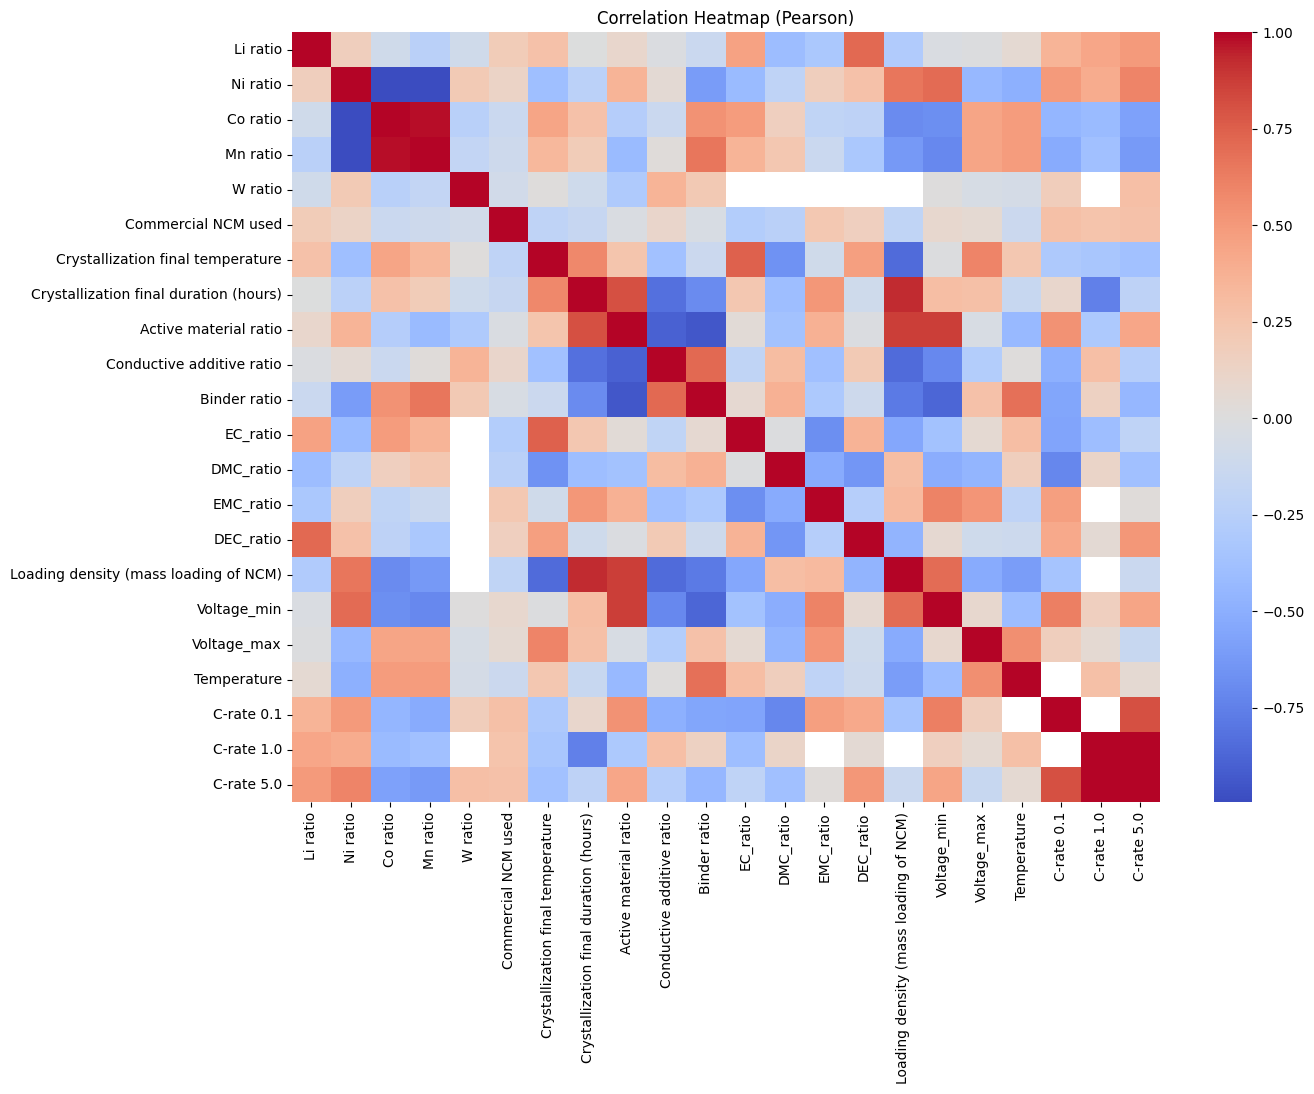

In [10]:
# Cell 5: 전체 상관 히트맵 (피처+타깃 전부)
plt.figure(figsize=(14, 10))
sns.heatmap(corrs["pearson"], cmap="coolwarm", center=0, annot=False)
plt.title("Correlation Heatmap (Pearson)")
plt.show()


In [55]:
# Cell 6: 타깃과의 상관만 발췌해서 보기 (가독성↑)


In [56]:
# 1) keep 필터 후 컬럼들
keep = set(numeric_cols + binary_cols + categorical_cols + target_cols)
df_keep = df.loc[:, [c for c in df.columns if c in keep]].copy()
print("after keep-filter columns:", df_keep.columns.tolist())

# 2) 타입 캐스팅
df_cast = cast_types_for_heatmap(df_keep, numeric_cols, binary_cols, categorical_cols, target_cols)

# 3) one-hot (top_k 동일하게 사용)
df_oh = one_hot_with_other(df_cast, categorical_cols, top_k=8)
print("one-hot columns added:",
      [c for c in df_oh.columns if any(c.startswith(col + "__") for col in categorical_cols)])

print("one-hot shape:", df_oh.shape)

# 4) 숫자형만
df_num = df_oh.select_dtypes(include=[np.number])
print("numeric-only shape:", df_num.shape)

# 5) zero-variance 삭제 직전/직후 비교
def _drop_zero_variance_debug(X):
    keep = []
    dropped = []
    for c in X.columns:
        col = X[c].dropna()
        if col.empty or col.nunique(dropna=False) <= 1 or np.isclose(col.std(ddof=0), 0.0, atol=1e-12):
            dropped.append(c)
        else:
            keep.append(c)
    return X[keep], dropped

df_num2, dropped_cols = _drop_zero_variance_debug(df_num)
print("dropped by zero-variance:", dropped_cols)
print("final heatmap shape:", df_num2.shape)


after keep-filter columns: ['Li ratio', 'Ni ratio', 'Co ratio', 'Mn ratio', 'O ratio', 'W ratio', 'Commercial NCM used', 'Lithium source', 'Synthesis method', 'Crystallization final temperature', 'Crystallization final duration (hours)', 'Active material ratio', 'Conductive additive ratio', 'Binder ratio', 'Electrolyte concentration', 'EC_ratio', 'DMC_ratio', 'EMC_ratio', 'DEC_ratio', 'Loading density (mass loading of NCM)', 'Voltage_min', 'Voltage_max', 'Temperature', 'C-rate 0.1', 'C-rate 1.0', 'C-rate 5.0']
one-hot columns added: ['Lithium source__li2co3', 'Lithium source__liac', 'Lithium source__lino3', 'Lithium source__lioh', 'Lithium source__other', 'Synthesis method__chemical vapor-assisted coating', 'Synthesis method__co-precipitation', 'Synthesis method__simple blending', 'Synthesis method__sol-gel', 'Synthesis method__solid-state reaction', 'Synthesis method__solution combustion']
one-hot shape: (25, 35)
numeric-only shape: (25, 24)
dropped by zero-variance: ['O ratio', 'Elec